In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Convertir el dateset en un DataFrame
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [5]:
# Información general y estadística descriptiva
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000

In [7]:
# Eliminar la columna 'name' del DataFrame
df = df.drop(columns=['name'])

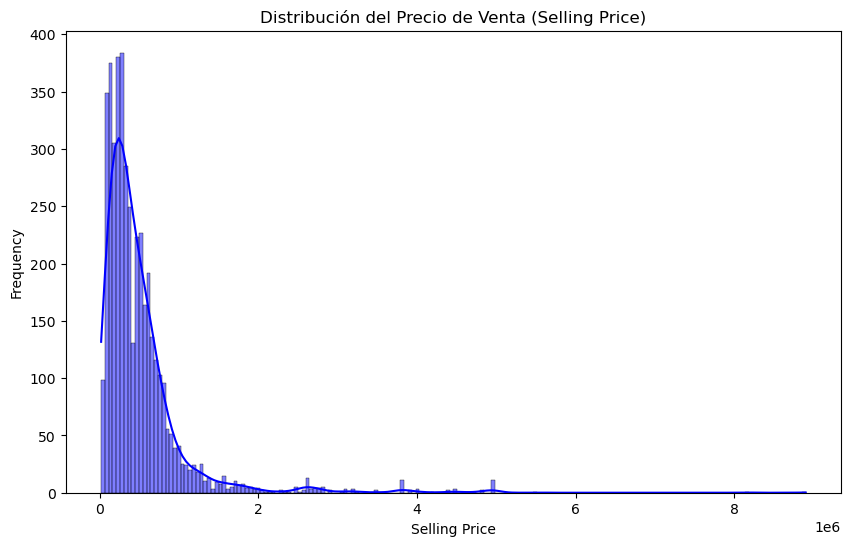

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de `selling_price`
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, color='blue')
plt.title("Distribución del Precio de Venta (Selling Price)")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


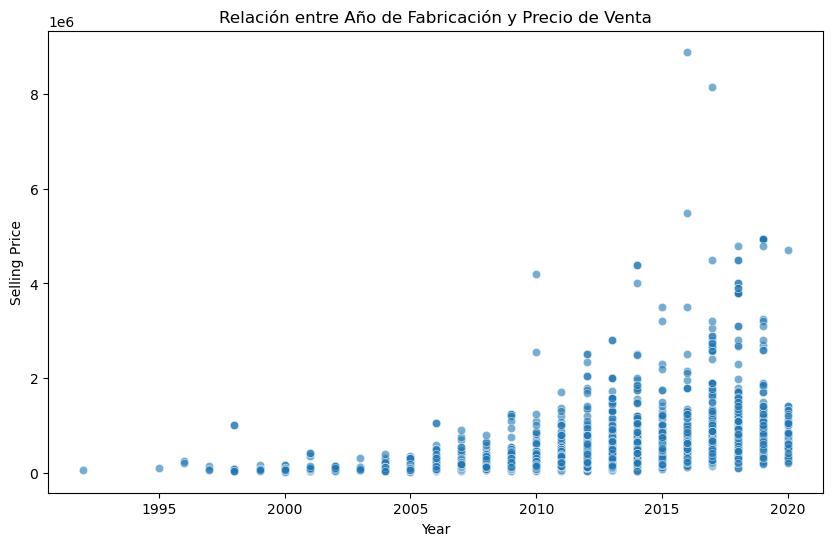

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.6)
plt.title("Relación entre Año de Fabricación y Precio de Venta")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

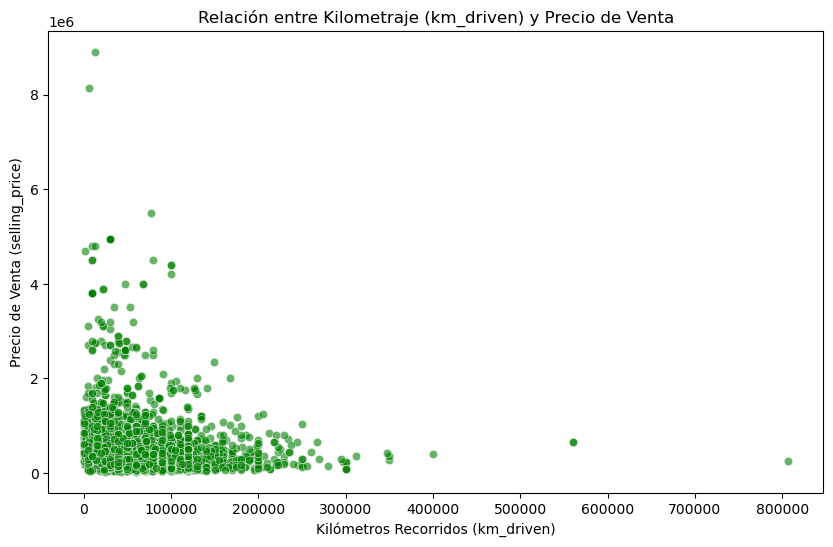

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='km_driven', y='selling_price', color='green', alpha=0.6)
plt.title("Relación entre Kilometraje (km_driven) y Precio de Venta")
plt.xlabel("Kilómetros Recorridos (km_driven)")
plt.ylabel("Precio de Venta (selling_price)")
plt.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_15284\329071572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fuel', y='selling_price', palette='Set2')


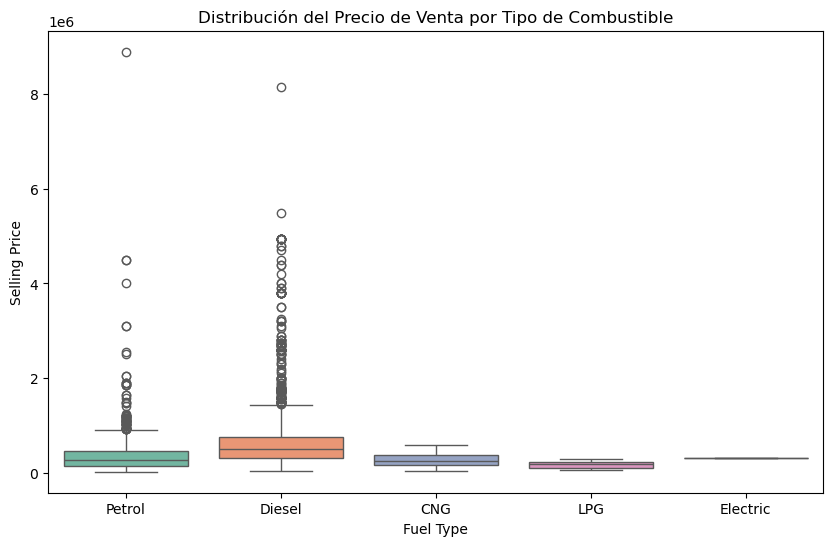

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fuel', y='selling_price', palette='Set2')
plt.title("Distribución del Precio de Venta por Tipo de Combustible")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_15284\397794361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='transmission', y='selling_price', palette='coolwarm')


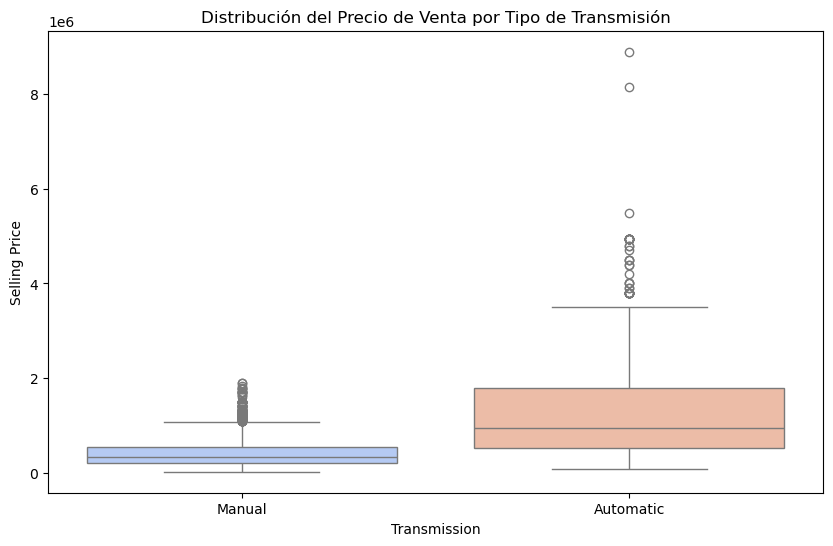

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission', y='selling_price', palette='coolwarm')
plt.title("Distribución del Precio de Venta por Tipo de Transmisión")
plt.xlabel("Transmission")
plt.ylabel("Selling Price")
plt.show()

In [15]:
# Revisión de valores faltantes
print("Valores faltantes en cada columna:")
print(df.isnull().sum())

# Imputación de valores faltantes en variables numéricas (usando la mediana)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)
df['km_driven'].fillna(df['km_driven'].median(), inplace=True)

# Imputación de valores faltantes en variables categóricas (usando la moda)
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)
df['seller_type'].fillna(df['seller_type'].mode()[0], inplace=True)
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['owner'].fillna(df['owner'].mode()[0], inplace=True)

Valores faltantes en cada columna:
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


C:\Users\diego\AppData\Local\Temp\ipykernel_15284\1949791056.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['selling_price'].fillna(df['selling_price'].median(), inplace=True)
C:\Users\diego\AppData\Local\Temp\ipykernel_15284\1949791056.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [16]:
# Codificación One-Hot Encoding para las variables categóricas
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

In [17]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas para estandarizar
variables_numericas = ['year', 'km_driven', 'selling_price']

# Escalar los datos
scaler = StandardScaler()
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

In [18]:
print("Dataset después del preprocesamiento:")
print(df.head())
print(df.info())

Dataset después del preprocesamiento:
       year  selling_price  km_driven  fuel_Diesel  fuel_Electric  fuel_LPG  \
0 -1.445074      -0.767746   0.081139        False          False     False   
1 -1.445074      -0.638096  -0.347689        False          False     False   
2 -0.258795       0.165731   0.724381         True          False     False   
3  0.927485      -0.439300  -0.433455        False          False     False   
4  0.215717      -0.093568   1.603479         True          False     False   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0         True                    True                         False   
1         True                    True                         False   
2        False                    True                         False   
3         True                    True                         False   
4        False                    True                         False   

   transmission_Manual  owner_Fourth & Above Owner  ow

In [19]:
# Definir X e y para el modelo
X = df.drop('selling_price', axis=1)  # Variables predictoras
y = df['selling_price']               # Variable objetivo

In [23]:
# Seleccionar todas las columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Aplicar el método IQR para eliminar valores atípicos en cada columna numérica
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)  # Primer cuartil
    Q3 = df[col].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1                # Rango intercuartílico
    
    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los datos para mantener solo los valores dentro de los límites
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Revisión de los datos después de eliminar valores atípicos
print("Datos después de eliminar valores atípicos:")
print(df.describe())

Datos después de eliminar valores atípicos:
              year  selling_price    km_driven
count  3813.000000    3813.000000  3813.000000
mean      0.036391      -0.192935    -0.071796
std       0.886796       0.406061     0.777007
min      -2.156842      -0.836892    -1.419738
25%      -0.496051      -0.517092    -0.669310
50%       0.215717      -0.266434    -0.133275
75%       0.690229       0.079298     0.509967
max       1.639252       0.943629     2.268163


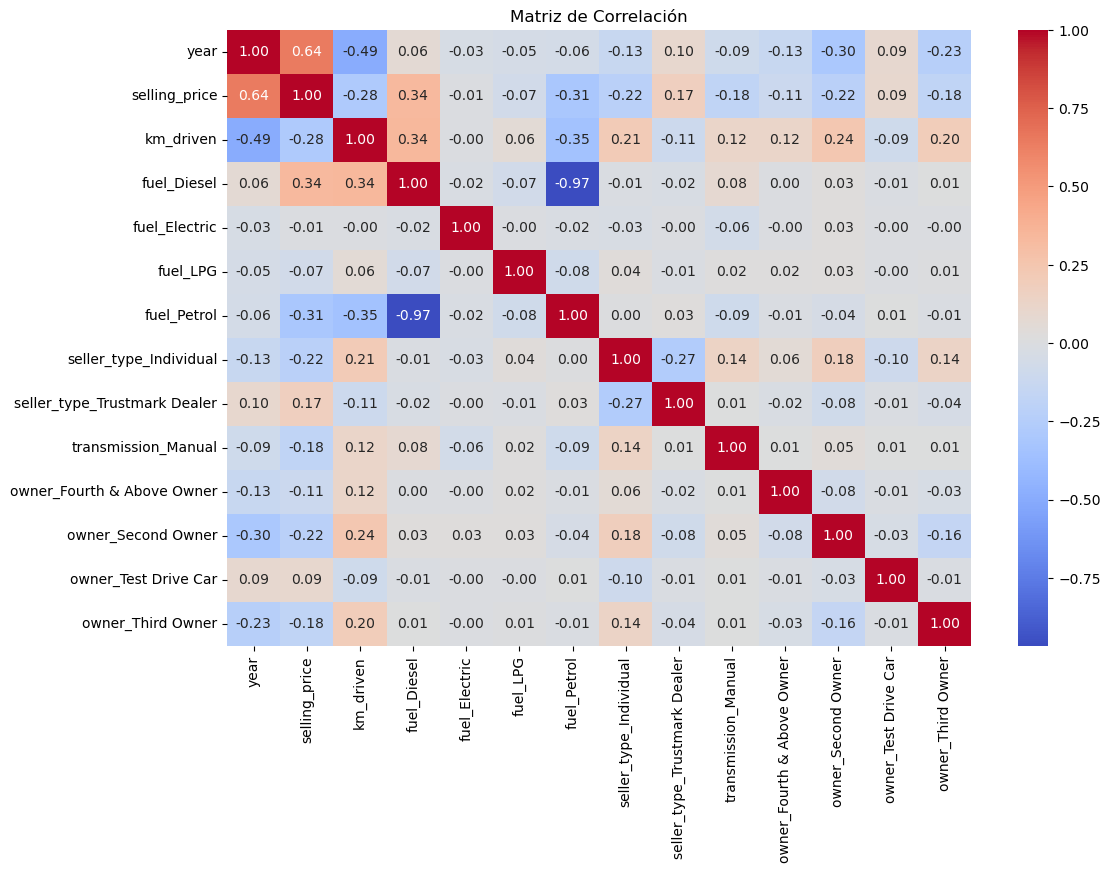

In [24]:
# Crear una matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [25]:
# Definir un umbral de correlación
threshold = 0.8

# Identificar las características altamente correlacionadas
corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            corr_features.add(colname)

# Eliminar características correlacionadas
df.drop(columns=corr_features, inplace=True)

In [26]:
from sklearn.feature_selection import SelectKBest, f_regression

# Definir X e y
X = df.drop('selling_price', axis=1)  # Variables predictoras
y = df['selling_price']                # Variable objetivo

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')  # k puede ser un número específico
X_selected = selector.fit_transform(X, y)

# Obtener los puntajes de cada característica
scores = selector.scores_
features = X.columns

# Crear un DataFrame con los resultados
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Puntajes de las características:")
print(feature_scores)

Puntajes de las características:
                         Feature        Score
0                           year  2632.999321
2                    fuel_Diesel   482.546890
1                      km_driven   329.802447
5         seller_type_Individual   187.878770
9             owner_Second Owner   187.565877
7            transmission_Manual   126.512424
11             owner_Third Owner   123.291590
6   seller_type_Trustmark Dealer   118.143397
8     owner_Fourth & Above Owner    45.463161
10          owner_Test Drive Car    33.842690
4                       fuel_LPG    19.385807
3                  fuel_Electric     0.123410


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Definir el modelo
model = LinearRegression()

# Aplicar RFE
rfe = RFE(model, n_features_to_select=5)  # Ajusta n_features_to_select según tus necesidades
X_rfe = rfe.fit_transform(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[rfe.support_]
print("Características seleccionadas por RFE:")
print(selected_features)

Características seleccionadas por RFE:
Index(['year', 'fuel_Diesel', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Test Drive Car'],
      dtype='object')


In [29]:
from sklearn.model_selection import train_test_split

# Seleccionar las características y la variable objetivo
X = df[['year', 'fuel_Diesel', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Test Drive Car']]
y = df['selling_price']

# Dividir el dataset en Train (80%) y Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas")

Tamaño del conjunto de entrenamiento: 3050 filas
Tamaño del conjunto de prueba: 763 filas


In [30]:
from sklearn.preprocessing import StandardScaler

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"R²: {r2:.2f}")

Error Cuadrático Medio (MSE): 0.07
R²: 0.55


In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definir el modelo Ridge
ridge_model = Ridge()

# Configurar los hiperparámetros para la búsqueda
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]  # Valores de regularización
}

# Realizar una búsqueda de cuadrícula (Grid Search)
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Imprimir el mejor parámetro encontrado
print("Mejor valor de alpha para Ridge:", grid_search.best_params_)

Mejor valor de alpha para Ridge: {'alpha': 10.0}


In [34]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Seleccionar las características y la variable objetivo
X = df[['year', 'fuel_Diesel', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Test Drive Car']]
y = df['selling_price']

# Dividir el dataset en Train (80%) y Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo Ridge con el mejor valor de alpha
ridge_model = Ridge(alpha=10.0)

# Ajustar el modelo con los datos de entrenamiento
ridge_model.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Obtener los coeficientes del modelo
coefficients = ridge_model.coef_

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame(coefficients, index=X.columns, columns=['Coeficiente'])
coef_df['Coeficiente'] = coef_df['Coeficiente'].round(4)  # Redondear a 4 decimales

# Mostrar los coeficientes
print(coef_df)

# Evaluar el modelo
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Error Cuadrático Medio (MSE) para Ridge: {mse_ridge:.2f}")
print(f"R² para Ridge: {r2_ridge:.2f}")

                              Coeficiente
year                               0.2398
fuel_Diesel                        0.1253
seller_type_Trustmark Dealer       0.0495
transmission_Manual               -0.0618
owner_Test Drive Car               0.0191
Error Cuadrático Medio (MSE) para Ridge: 0.07
R² para Ridge: 0.55


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular las métricas
mse_test = mean_squared_error(y_test, y_pred_ridge)
mae_test = mean_absolute_error(y_test, y_pred_ridge)
r2_test = r2_score(y_test, y_pred_ridge)

# Imprimir las métricas
print(f"Error Cuadrático Medio (MSE): {mse_test:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_test:.2f}")
print(f"R²: {r2_test:.2f}")

Error Cuadrático Medio (MSE): 0.07
Error Absoluto Medio (MAE): 0.21
R²: 0.55


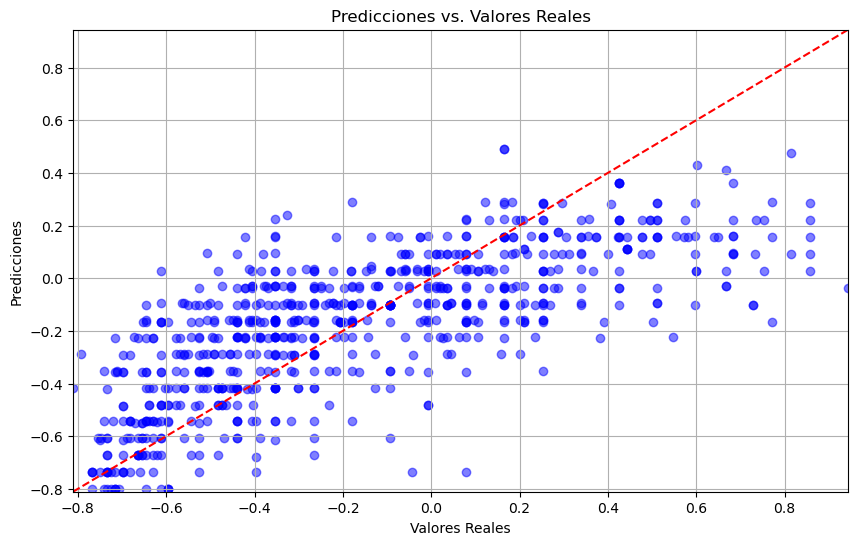

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

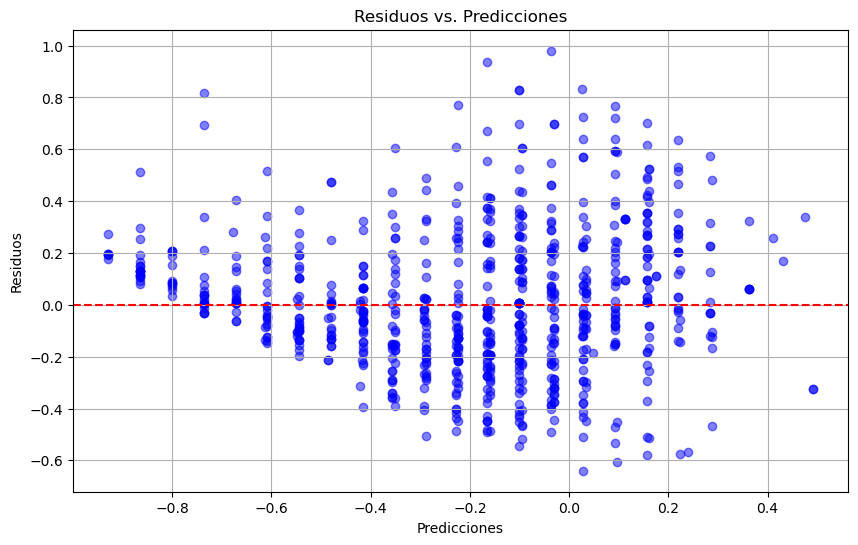

In [37]:
# Calcular los residuos
residuals = y_test - y_pred_ridge

# Gráfico de residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid()
plt.show()

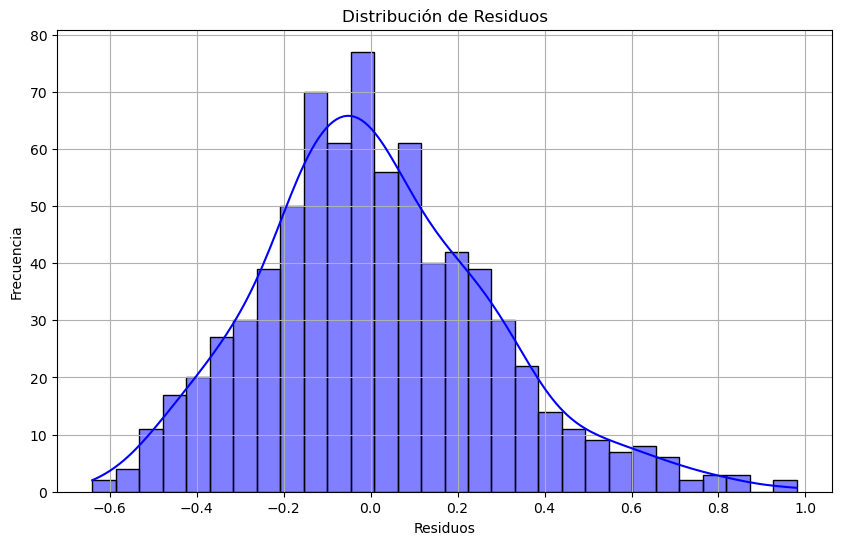

In [38]:
# Histograma de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

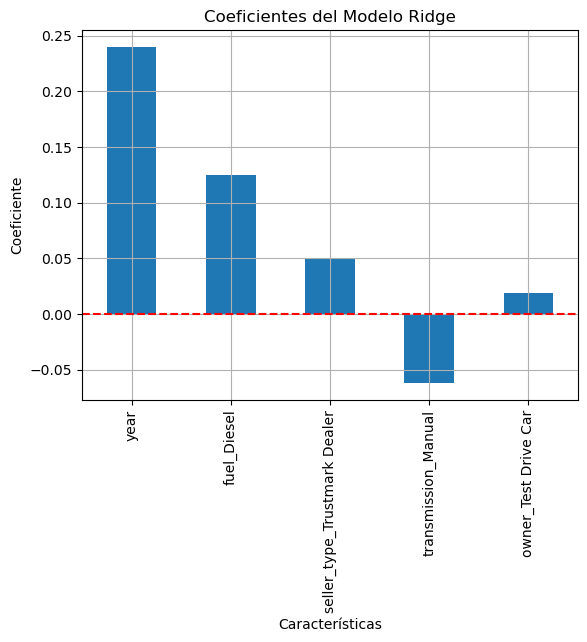

In [39]:
# Gráfico de coeficientes
plt.figure(figsize=(10, 6))
coef_df.plot(kind='bar', legend=False)
plt.title('Coeficientes del Modelo Ridge')
plt.xlabel('Características')
plt.ylabel('Coeficiente')
plt.axhline(0, color='red', linestyle='--')
plt.grid()
plt.show()